In [1255]:
#Проведем первичную обработку данных. 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
import numpy as np

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок



In [1256]:
students = pd.read_csv('stud_math.csv')

In [1257]:
students.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


In [1258]:
students.info()
#Датасет содержит 30 столбцов. Из них колонок с типом dtypes: float64 - 12, int64 - 1, object - 17.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [1259]:
#выведем названия колонок
students.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')

In [1260]:
#Сведем названия к единому формату(большие буквы заменяем на маленькие).
students.columns = ['school', 'sex', 'age', 'address', 'famsize', 'pstatus', 'medu', 'fedu',
       'mjob', 'fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'studytime, granular',
       'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score']


In [1261]:
#Колонки school, sex, age не содержат пустых значений. 
students.school.value_counts()

GP    349
MS     46
Name: school, dtype: int64

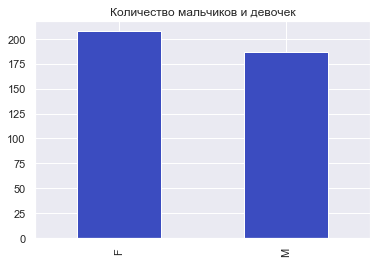

In [1262]:
#Посмотрим распределение между мальчиками и девочками
students.sex.value_counts()
students.sex.value_counts().plot(kind = 'bar', 
                              grid = True, 
                              colormap = 'coolwarm', 
                              title = 'Количество мальчиков и девочек')



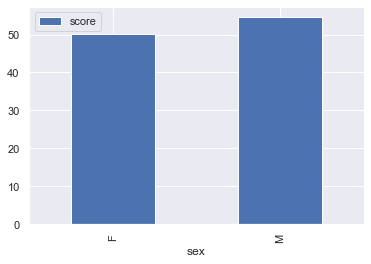

In [1263]:
#посмотрим,средние значения результатов экзамена в зависимости от половой принадлежности
students.pivot_table(values = ['score'], 
               index = 'sex', 
               aggfunc = 'mean').plot(kind = 'bar')
#Из графика видно, что мальчики сдают экзамен немного лучше девочек.

In [1264]:
students.corr()

,age,medu,fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
age,1.000000,-0.161704,-0.138018,0.081508,-0.015556,0.228047,0.015556,0.068899,0.029023,0.135107,-0.065946,0.093592,-0.155726
medu,-0.161704,1.000000,0.275598,-0.173515,0.078589,-0.245463,-0.078589,-0.010050,0.025335,0.064164,-0.045051,-0.011944,0.213349
fedu,-0.138018,0.275598,1.000000,0.030646,0.057199,-0.150821,-0.057199,0.040577,-0.066556,-0.023282,0.027251,0.004695,0.078573
traveltime,0.081508,-0.173515,0.030646,1.000000,-0.102206,0.064699,0.102206,-0.016857,-0.021937,0.037636,-0.021531,-0.048215,-0.070559
studytime,-0.015556,0.078589,0.057199,-0.102206,1.000000,-0.178992,-1.000000,0.045894,-0.121969,-0.051280,-0.080016,-0.026544,0.115741
failures,0.228047,-0.245463,-0.150821,0.064699,-0.178992,1.000000,0.178992,-0.022655,0.098382,0.120914,0.081284,0.057391,-0.344338
"studytime, granular",0.015556,-0.078589,-0.057199,0.102206,-1.000000,0.178992,1.000000,-0.045894,0.121969,0.051280,0.080016,0.026544,-0.115741
famrel,0.068899,-0.010050,0.040577,-0.016857,0.045894,-0.022655,-0.045894,1.000000,0.175743,0.081154,0.077474,-0.082609,0.057112
freetime,0.029023,0.025335,-0.066556,-0.021937,-0.121969,0.098382,0.121969,0.175743,1.000000,0.296437,0.061575,0.009292,0.019026
goout,0.135107,0.064164,-0.023282,0.037636,-0.051280,0.120914,0.051280,0.081154,0.296437,1.000000,-0.015608,-0.048738,-0.129685


In [1265]:
students.drop(columns = ['studytime, granular'], axis = 1, inplace = True)

In [1267]:
Столбцы 'studytime' и 'studytime, granular' скоррелированны с точностью до знака, поэтому один столбец можно удалить, 
новой информации он не несет. Удаляем 'studytime, granular'. 

In [1268]:
#Проверяем, удалился ли столбец 'studytime, granular'.
students.head()

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


In [ ]:
Перед тем, как начинать чистить данные, посмотрим сколько пропущенных значений в самом важном 
для нас столбце 'score'.

In [1269]:
display(students.score.describe())
display(students.score.isnull().sum())
#Их 6. Удалим строки с пропущенными значениями в столбце 'score', чтобы не подделывать данные.


count    389.000000
mean      52.262211
std       22.919022
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

6

In [1270]:
#Убираем строки с незаполненными оценками
def drop_score(row):
    if pd.isnull(row['score']):
        return 999
    return row['score']

students['score'] = students.apply(drop_score, axis = 1)     

students = students[students.score != 999]
display(students)
#Количество строк сократилось на 6.

students.score.value_counts(dropna=False)
#Отсутствуют строки со значениями score равным NaN или 999. Функция отработала правльно.

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,NaN,1.0,2.0,2.0,no,yes,yes,no,yes,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,NaN,1.0,1.0,3.0,NaN,no,no,no,no,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,NaN,no,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


50.0     54
55.0     46
0.0      37
75.0     33
65.0     31
40.0     31
60.0     31
70.0     27
45.0     27
80.0     16
30.0     15
90.0     12
35.0      9
25.0      7
85.0      6
95.0      5
100.0     1
20.0      1
Name: score, dtype: int64

In [ ]:
Убедившись, что все значение непустые, посмотрим, имеются ли выбросы в распределении оценок по математике.
Воспользуемся формулами межквартильного размаха, вычислим медиану и квартили.

25-й перцентиль: 40.0, 75-й перцентиль: 70.0, IQR: 30.0,  Границы выбросов: [-5.0, 115.0].


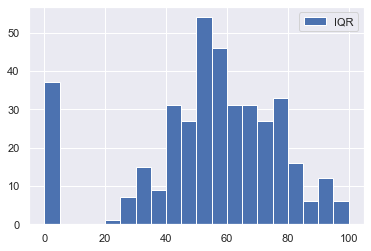

In [1271]:
median = students.score.median()
IQR = students.score.quantile(0.75) - students.score.quantile(0.25)
p25 = students.score.quantile(0.25)
p75 = students.score.quantile(0.75)

print('25-й перцентиль: {},'.format(p25), '75-й перцентиль: {},'.format(p75)
      , "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f=p25 - 1.5*IQR, l=p75 + 1.5*IQR))

students.score.loc[students.score.between(p25 - 1.5*IQR, p75 + 1.5*IQR)].hist(bins = 20, range = (0, 100), 
                                                                          label = 'IQR')
                                                        
plt.legend();

In [ ]:
Границы выбросов такие, что график не выходит за пределы границ. Делаем вывод, что выбросов нет.

In [1272]:
display(students.nunique())
#Количество уникальных значения для наглядности.

school         2
sex            2
age            8
address        2
famsize        2
pstatus        2
medu           5
fedu           6
mjob           5
fjob           5
reason         4
guardian       3
traveltime     4
studytime      4
failures       4
schoolsup      2
famsup         2
paid           2
activities     2
nursery        2
higher         2
internet       2
romantic       2
famrel         6
freetime       5
goout          5
health         5
absences      36
score         18
dtype: int64

In [ ]:
Выведем процентное соотношение пустых значений в столбцах с помощью метода numpy.

In [1273]:
for col in students.columns:
    pct_missing = np.mean(students[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))
#Еще работать и работать...

school - 0.0%
sex - 0.0%
age - 0.0%
address - 4.0%
famsize - 7.0%
pstatus - 12.0%
medu - 1.0%
fedu - 6.0%
mjob - 5.0%
fjob - 9.0%
reason - 4.0%
guardian - 8.0%
traveltime - 7.0%
studytime - 2.0%
failures - 6.0%
schoolsup - 2.0%
famsup - 10.0%
paid - 10.0%
activities - 4.0%
nursery - 4.0%
higher - 5.0%
internet - 9.0%
romantic - 8.0%
famrel - 7.0%
freetime - 2.0%
goout - 2.0%
health - 4.0%
absences - 3.0%
score - 0.0%


count    389.000000
mean      16.673522
std        1.265662
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

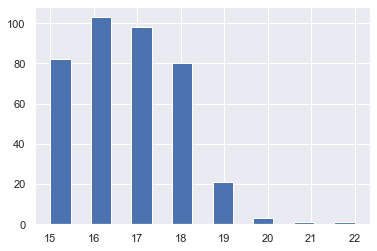

In [1274]:
#Cтоблец 'age' числовой и без пропусков,посмотрим его распределение.
students.age.hist(bins=15)
students.age.describe()

In [ ]:
Видим, что основное распределение лежит между 15 и 18 годами, 
замечаем, что есть потенциальные выбросы.
Отфильтруем выбросы. Воспользуемся формулой интерквартильного расстояния (межквартильного размаха).
Выбросом считаются такие значения, которые лежат вне рамок:

percentile(25) - 1.5*IQR и percentile(75) + 1.5*IQR,
где IQR = percentile(75) - percentile(25) (межквартильный размах)

25-й перцентиль: 16.0, 75-й перцентиль: 18.0, IQR: 2.0,  Границы выбросов: [13.0, 21.0].


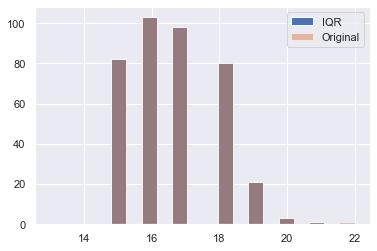

In [1275]:
median = students.age.median()
IQR = students.age.quantile(0.75) - students.age.quantile(0.25)
p25 = students.age.quantile(0.25)
p75 = students.age.quantile(0.75)

print('25-й перцентиль: {},'.format(p25), '75-й перцентиль: {},'.format(p75), "IQR: {}, ".format(IQR), 
      "Границы выбросов: [{f}, {l}].".format(f=p25 - 1.5*IQR, l=p75 + 1.5*IQR))
#Построим срвнительный график между IQR и изначальными данными (Original)
students.age.loc[students.age.between(p25 - 1.5*IQR, p75 + 1.5*IQR)].hist(bins = 20, range = (13, 22), label = 'IQR')
students.age.hist(alpha = 0.5, bins=20, range = (13, 22), label = 'Original')
plt.legend();

In [1276]:
Методология расчета выбросов требует отбросить выброс, равный 22 годам, с другой стороны, в условии дано, 
что возраст экзаменующихся от 15 до 22 лет. Поскольку выброс всего один из 395 человек, то можно считать,
что он не влияет на распределение данных и его можно удалить.

In [1277]:
#Убираем выбросы сверху фильтрацией
students = students[students.age <= 21]
students
#количество строк сократилось всего на 1

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,NaN,1.0,2.0,2.0,no,yes,yes,no,yes,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,NaN,1.0,1.0,3.0,NaN,no,no,no,no,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,NaN,no,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


In [1278]:
#Проходимся последовательно по столбцам. Посмотрим количество пустых ячеек в столбце 'address'.
students.address.isnull().sum()

15

In [1279]:
students.address.describe()

count     373
unique      2
top         U
freq      290
Name: address, dtype: object

In [1280]:
Тип столбца dtype: object
Видим, что заполнены не все строки, а именно, в 15ти строках отсутвуют данные. А так же видно, что большая часть 
значений (290 из 373) имеют статус U.

In [1281]:
#Предположим, что пропущенные значения можно заменить на предыдущее значение с помощью method = 'bfill'.
students.address.fillna(method = 'bfill', inplace = True) 

In [1282]:
#Проверим, заполнение пропусков.
display(students.address.value_counts())
#Убедимся, что первое значение не пустое (т.к. использовали метод 'bfill')
students.address.head()

U    299
R     89
Name: address, dtype: int64

0    U
1    U
2    U
3    U
4    U
Name: address, dtype: object

In [1283]:
#Проанализируем следующий столбец 'school'
students.school.isnull().sum()

0

In [1284]:
#Попытаемся установить возможные логические взаимосвязи между параметрами в датасете
#Проверим взаимосвязь между школой 'school' и адресом 'address'.
display(students[students.school == 'GP'].address.value_counts())
display(students[students.school == 'MS'].address.value_counts())

U    280
R     63
Name: address, dtype: int64

R    26
U    19
Name: address, dtype: int64

In [1285]:
В школе GP соотношение городских жителей к иногородним 280/63 = 4.4, 
а в школе MS это соотношение равно 26/19 = 1.4.
На основании данного вывода предполагаем, что школа GP находится ближе к центру города, а школа MS ближе к окраине.

SyntaxError: invalid syntax (<ipython-input-1285-b6c745aa7f56>, line 1)

In [1286]:
#Проверяем эту гипотезу в завимости от времени до школы.
display(students[(students.school == 'GP') & (students.address == 'R')].traveltime.value_counts())
display(students[(students.school == 'MS') & (students.address == 'R')].traveltime.value_counts())

1.0    31
2.0    18
3.0     5
4.0     3
Name: traveltime, dtype: int64

2.0    10
3.0     7
1.0     5
4.0     1
Name: traveltime, dtype: int64

In [1287]:
Гипотеза не подтвердилась. 
Большинство иногородних учеников добираются до школы GP менее 15 минут, а иногородние студенты школы MS - более 15 мин.
Значит наше предположение, о нахождении школ ближе к центру и окраине не верно.

In [1288]:
#Еще раз посмотрим пропущенные значения во всём датасете.
display(students.isna().sum())

school         0
sex            0
age            0
address        0
famsize       27
pstatus       45
medu           3
fedu          24
mjob          19
fjob          36
reason        17
guardian      31
traveltime    28
studytime      7
failures      22
schoolsup      9
famsup        38
paid          39
activities    14
nursery       15
higher        20
internet      34
romantic      31
famrel        27
freetime       9
goout          7
health        15
absences      11
score          0
dtype: int64

In [1289]:
#Попытаемся установить возможные логические взаимосвязи между параметрами в датасете
#Проверим связь между причиной выбора школы 'reason' и временем до школы 'traveltime' и заполним пустые ячейки.
display(students[students.reason == 'home'].traveltime.value_counts())
display(students[students.reason == 'home'].traveltime.isnull().sum()) 
#Видим, что если причина выбора школы рядом с домом, то время до школы < 15 минут в 71% случаев (68 из 95)

1.0    68
2.0    23
3.0     2
4.0     2
Name: traveltime, dtype: int64

6

In [1290]:
#Поэтому заменим пропущенные значения в столбце 'traveltime' на основании значения 'reason'

def fill_traveltime(row):
    if pd.isnull(row['traveltime']):
        if row['reason'] == 'home':
            return 1
        return row['traveltime']
    return row['traveltime']
            
students['traveltime'] = students.apply(fill_traveltime, axis = 1)     

display(students[students.reason == 'home'].traveltime.isnull().sum()) 
#Видно, что 6 нулевых значений заполнились.

0

In [1291]:
#Проанализируем пустые ячейки в столбце 'reason', для которых время до школы менее 15 мин
display(students[students.traveltime == 1].reason.isnull().sum()) 
# 13 пропущенных значений. 
# А также распределение 'reason', для которых время до школы менее 15 мин
display(students[students.traveltime == 1].reason.value_counts())
# Т.к. распределение равномерно, мы не можем сделать обратное предположение, 
# что если дорога до дома занимает < 15 минут, то причина выбора школы - близость к дому.

13

course        76
home          74
reputation    61
other         20
Name: reason, dtype: int64

In [1292]:
#Исследуем значения в столбце размера семьи
display(students.famsize.value_counts())
#Значения в данном столбце имеют две категории: 'LE3' <= 3, 'GT3' >3
#Пропусков в нем 27
display(students.famsize.isnull().sum()) 

GT3    254
LE3    107
Name: famsize, dtype: int64

27

In [1293]:
#Исследуем потенциальную зависимоcть размера семьи и проживания родителей совместно.
#Зададим переменные и выведем для наглядности на экран пропорции.

a=students[students.famsize == 'GT3'].pstatus.value_counts()[0]
b=students[students.famsize == 'GT3'].pstatus.value_counts()[1]
c=students[students.famsize == 'LE3'].pstatus.value_counts()[0]
d=students[students.famsize == 'LE3'].pstatus.value_counts()[1]
x = round((a*100/(a+b)),2)
y = round((c*100/(c+d)),2)
print('В больших семьях {}% родителей живут вместе.'.format(x))
print('В маленьких семьях {}% родителей живут вместе.'.format(y))

# Как видно, явной зависимости нет - в больших и маленьких семьях большинство родителей живут вместе

В больших семьях 91.15% родителей живут вместе.
В маленьких семьях 86.17% родителей живут вместе.


In [1294]:
#Исследуем потенциальную обратную зависимоcть: проживание родителей совместно от размера семьи.

display(students[students.pstatus == 'T'].famsize.value_counts())
display(students[students.pstatus == 'A'].famsize.value_counts())

a=students[students.pstatus == 'T'].famsize.value_counts()[0]
b=students[students.pstatus == 'T'].famsize.value_counts()[1]
c=students[students.pstatus == 'A'].famsize.value_counts()[0]
d=students[students.pstatus == 'A'].famsize.value_counts()[1]
x = round((a*100/(a+b)),2)
y = round((c*100/(c+d)),2)


print('Среди полных семей {}% - большие семьи с 4 и более членами семьи.'.format(x))
print('Среди неполных семей {}% - большие семьи с 4 и более членами семьи.'.format(y))

#Итог: большинство семей полные и родители живут совместно.
#Сформировать предположение для заполнения пустых значений на основании взаимосвязи не можем 

GT3    206
LE3     81
Name: famsize, dtype: int64

GT3    20
LE3    13
Name: famsize, dtype: int64

Среди полных семей 71.78% - большие семьи с 4 и более членами семьи.
Среди неполных семей 60.61% - большие семьи с 4 и более членами семьи.


In [1295]:
#Т.к. распределение в параметре 'famsize' достаточно равномерное,
display(students.famsize.value_counts())
# и количество пропусков достаточно большое
display(students.famsize.isnull().sum()) 

GT3    254
LE3    107
Name: famsize, dtype: int64

27

In [1296]:
# для заполнения пропусков воспользуемся методом 'bfill'
students.famsize.fillna(method = 'bfill', inplace = True) 
# Проверим результат заполнения
display(students.famsize.value_counts())
display(students.famsize.isnull().sum()) 

GT3    274
LE3    114
Name: famsize, dtype: int64

0

In [1297]:
#Исследуем значения в столбце совместного проживания родителей
display(students.pstatus.value_counts())
#Значения в данном столбце имеют две категории: Т - живут вместе, 'А' - живут отдельно
display(students.pstatus.isnull().sum()) 
#Пропусков в нем 45

T    307
A     36
Name: pstatus, dtype: int64

45

In [1298]:
#Проверим возможную зависимость между статуcом работы at_home и статусом совместного проживания родителей pstatus.
display(students[(students.fjob =='at_home') & (students.mjob =='at_home')].pstatus.value_counts())
display(students[students.fjob =='at_home'].pstatus.value_counts())
display(students[students.mjob =='at_home'].pstatus.value_counts())
#Прослеживается закономерность - если мама сидит дома, то родители в этих семьях проживают совместно в 49 из 52 случаях

T    4
A    1
Name: pstatus, dtype: int64

T    13
A     2
Name: pstatus, dtype: int64

T    49
A     3
Name: pstatus, dtype: int64

In [1299]:
# Сформируем функцию: если колонка mjob принимает значение 'at_home', то родители живут вместе, 
#если любое другое значение, то 'pstatus' оставляем как есть в изначальном файле.

def fill_pstatus(row):
    if pd.isnull(row.pstatus):
        if row['mjob'] == 'at_home':
            return 'T'
    return row['pstatus']
            
students['pstatus'] = students.apply(fill_pstatus, axis = 1)

display(students.pstatus.isnull().sum()) 
#На основании функции заполнились значения в 6 строках
# Обновленное распределение
display(students.pstatus.value_counts())

39

T    313
A     36
Name: pstatus, dtype: int64

In [1300]:
# для заполнения пропусков воспользуемся методом 'bfill'
students.pstatus.fillna(method = 'bfill', inplace = True) 
# Проверим результат заполнения
display(students.pstatus.value_counts())
display(students.pstatus.isnull().sum()) 

T    350
A     38
Name: pstatus, dtype: int64

0

In [1301]:
#Еще раз посмотрим пропущенные значения во всём датасете.
display(students.isna().sum())

school         0
sex            0
age            0
address        0
famsize        0
pstatus        0
medu           3
fedu          24
mjob          19
fjob          36
reason        17
guardian      31
traveltime    22
studytime      7
failures      22
schoolsup      9
famsup        38
paid          39
activities    14
nursery       15
higher        20
internet      34
romantic      31
famrel        27
freetime       9
goout          7
health        15
absences      11
score          0
dtype: int64

4.0    134
2.0    100
3.0     95
1.0     56
0.0      3
Name: medu, dtype: int64

0

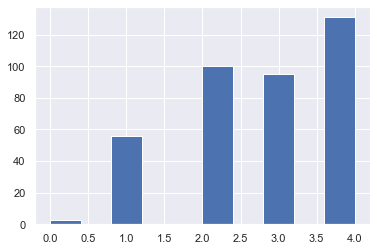

In [1302]:
students.medu.hist()

#В этом столбце пропущенных значений всего 3, заменим их на моду.
students.medu.fillna(students.medu.mode()[0], inplace = True)
# Проверим результат заполнения
display(students.medu.value_counts())
display(students.medu.isnull().sum()) 


In [1303]:
display(students.fedu.value_counts())
display(students.fedu.isnull().sum()) 
#Распределение образования отцов достаточно равномерное, пропущеных значений 24 (достаточно много),

2.0     105
3.0      94
4.0      88
1.0      74
0.0       2
40.0      1
Name: fedu, dtype: int64

24

In [1304]:
# также применим метод заполнения fillna с параметром 'bfill'(заполнение 'послестоящим' значением).
students.fedu.fillna(method = 'bfill', inplace = True) 
# Проверим результат заполнения
display(students.fedu.value_counts())
display(students.fedu.isnull().sum()) 

2.0     111
3.0      99
4.0      91
1.0      84
0.0       2
40.0      1
Name: fedu, dtype: int64

0

In [1305]:
#Категориальный признак 'fedu', похоже, имеет опечатку со значением 40.0. Исправим ее на 4.0.

def func_replace(row):
    if row['fedu'] == 40:
        return 4
    return row['fedu']
students['fedu'] = students.apply(func_replace, axis = 1)     

#Проверим результат
display(students.fedu.describe())

count    388.000000
mean       2.502577
std        1.091425
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        4.000000
Name: fedu, dtype: float64

other       127
services     97
at_home      58
teacher      55
health       32
Name: mjob, dtype: int64

19

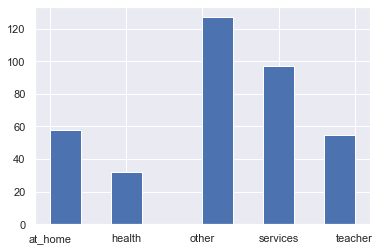

In [1306]:
display(students.mjob.value_counts())
display(students.mjob.isnull().sum()) 
students.mjob.hist()
#Распределение признака работы мамы достаточно равномерное, пропущеных значений 19

In [1307]:
#Заполним пустые значения методом ffill.
students.mjob.fillna(method = 'ffill', inplace = True) 

#Проверим результат заполнения
display(students.mjob.value_counts())
students.mjob.isnull().sum()

other       132
services    104
at_home      63
teacher      57
health       32
Name: mjob, dtype: int64

0

other       194
services     98
teacher      29
at_home      16
health       15
Name: fjob, dtype: int64

36

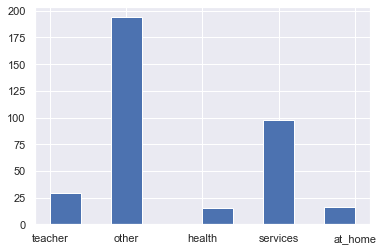

In [1308]:
display(students.fjob.value_counts())
display(students.fjob.isnull().sum()) 
students.fjob.hist()
#Распределение признака работы мамы достаточно равномерное, пропущеных значений 36

In [1309]:
#Заполним пустые значения методом ffill.
students.fjob.fillna(method = 'ffill', inplace = True) 

#Проверим результат заполнения
display(students.fjob.value_counts())
students.fjob.isnull().sum()

other       212
services    111
teacher      30
at_home      19
health       16
Name: fjob, dtype: int64

0

course        135
reputation    102
home          101
other          33
Name: reason, dtype: int64

17

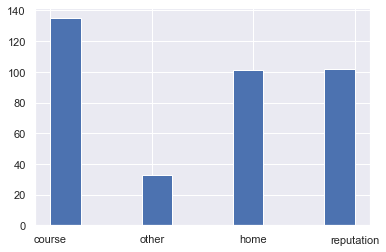

In [1310]:
display(students.reason.value_counts())
display(students.reason.isnull().sum()) 
students.reason.hist()
#Распределение признака причины выбора школы равномерное, пропущеных значений 17

In [1311]:
#Заполним пустые значения методом ffill.
students.reason.fillna(method = 'ffill', inplace = True) 

#Проверим результат заполнения
display(students.reason.value_counts())
students.reason.isnull().sum()

course        144
reputation    107
home          102
other          35
Name: reason, dtype: int64

0

mother    247
father     86
other      24
Name: guardian, dtype: int64

31

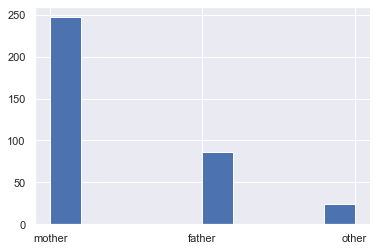

In [1312]:
#Исследуем признак guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)
#Пропущенных значений достаточно много (31)
display(students.guardian.value_counts())
display(students.guardian.isnull().sum())
students.guardian.hist()

In [1313]:
#Исследуем возможную зависимость опекунства от полноты семьи.

display(students[students.pstatus =='T'].guardian.value_counts())
display(students[students.pstatus =='A'].guardian.value_counts())
a = students[students.pstatus =='T'].guardian.value_counts()[0]
b = students[students.pstatus =='T'].guardian.value_counts()[1]
c = students[students.pstatus =='T'].guardian.value_counts()[2]
x = round(a/(a+b+c)*100,1)

q = students[students.pstatus =='A'].guardian.value_counts()[0]
w = students[students.pstatus =='A'].guardian.value_counts()[1]
e = students[students.pstatus =='A'].guardian.value_counts()[2]
y = round(q/(q+w+e)*100,1)

print('{}% учеников опекает мать среди семей живущих совместно.'.format(x))
print('{}% учеников опекает мать среди семей живущих раздельно.'.format(y))

#БОльшая часть учеников опекается матерью независимо от полноты семьи, 
#т.е. возможность заполнения пустых значений на основании правила отсутствует

#поэтому также можно заменять пустые
#значения используя метод fillna с параметром 'bfill'(заполнение 'послестоящим' значением)

mother    218
father     82
other      20
Name: guardian, dtype: int64

mother    29
father     4
other      4
Name: guardian, dtype: int64

68.1% учеников опекает мать среди семей живущих совместно.
78.4% учеников опекает мать среди семей живущих раздельно.


In [1314]:
#Заполним пустые значения методом bfill.
students.guardian.fillna(method = 'bfill', inplace = True) 

#Проверим результат заполнения
display(students.guardian.value_counts())
students.guardian.isnull().sum()

mother    272
father     92
other      24
Name: guardian, dtype: int64

0

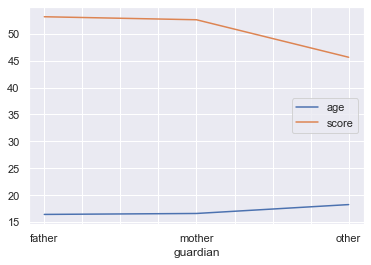

In [1315]:
#посмотрим,средние значения результатов экзамена и возраста в зависимости от опекуна.
students.pivot_table(values = ['age','score'], 
               index = 'guardian', 
               aggfunc = 'mean').plot()
# Видно, что если опекун кто-то другой (other), то результаты экзаменов немного хуже. 

In [1316]:
#Исследуем параметр времени до школы 'traveltime' (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)
display(students.traveltime.value_counts())
display(students.traveltime.isnull().sum())

1.0    244
2.0     94
3.0     21
4.0      7
Name: traveltime, dtype: int64

22

In [1317]:
#Проанализируем время до школы в зависимости от адреса учеников
display(students[students.address =='U'].traveltime.value_counts())
display(students[students.address =='U'].traveltime.isnull().sum())
display(students[students.address =='R'].traveltime.value_counts())
display(students[students.address =='R'].traveltime.isnull().sum())

#address — тип адреса ученика ('U' - городской, 'R' - за городом)

#Тут видно, что большинство учеников тратят на дорогу меньше 15 минут, 
#причем, как те, кто живет в городе так и те, кто живет за городом.




1.0    206
2.0     66
3.0      9
4.0      3
Name: traveltime, dtype: int64

15

1.0    38
2.0    28
3.0    12
4.0     4
Name: traveltime, dtype: int64

7

1.0    260
2.0     98
3.0     23
4.0      7
Name: traveltime, dtype: int64

0

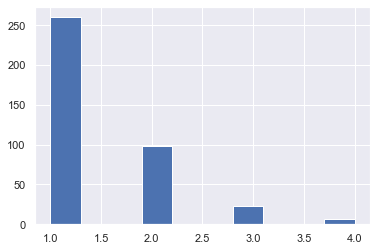

In [1318]:
#Заполним пустые значения методом bfill.
students.traveltime.fillna(method = 'bfill', inplace = True) 

#Проверим результат заполнения
display(students.traveltime.value_counts())
display(students.traveltime.isnull().sum())
students.traveltime.hist()

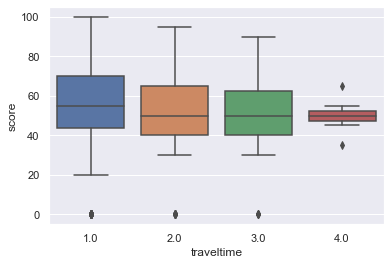

In [1319]:
#Предварительно проверим влияение traveltime на оценки
sns.boxplot(x='traveltime', y='score', data=students)
#Из графика видим, что немного лучше оценки учеников, тратящих на дорогу менее 15 мин
#для остальных влияние практически отсутствует

count    381.00000
mean       2.03937
std        0.84668
min        1.00000
25%        1.00000
50%        2.00000
75%        2.00000
max        4.00000
Name: studytime, dtype: float64

2.0    189
1.0    102
3.0     63
4.0     27
Name: studytime, dtype: int64

7

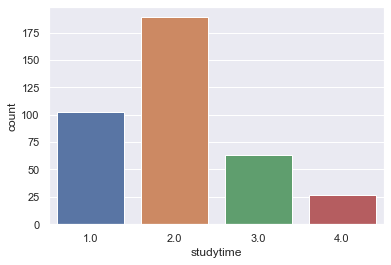

In [1320]:
#studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)
display(students.studytime.describe())
display(students.studytime.value_counts())
display(students.studytime.isnull().sum())

sns.countplot(x = 'studytime', data = students)


In [1321]:
#Заполним пустые значения методом bfill.
students.studytime.fillna(method = 'bfill', inplace = True) 

#Проверим результат заполнения
display(students.studytime.value_counts())
display(students.studytime.isnull().sum())

2.0    192
1.0    104
3.0     65
4.0     27
Name: studytime, dtype: int64

0

count    366.000000
mean       0.319672
std        0.716916
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64

0.0    290
1.0     48
2.0     15
3.0     13
Name: failures, dtype: int64

22

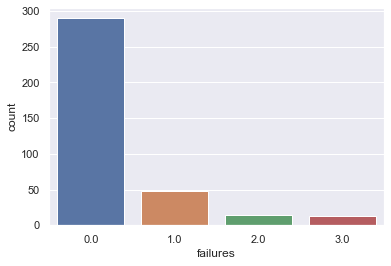

In [1322]:
#failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)
display(students.failures.describe())
display(students.failures.value_counts())
display(students.failures.isnull().sum())

sns.countplot(x = 'failures', data = students)


In [1323]:
#Заполним 22 пустых значения соседними значениями по методу ffill.
students.failures.fillna(method = 'ffill', inplace = True) 

#Проверим результат заполнения
display(students.failures.value_counts())
display(students.failures.isnull().sum())

0.0    308
1.0     50
2.0     16
3.0     14
Name: failures, dtype: int64

0

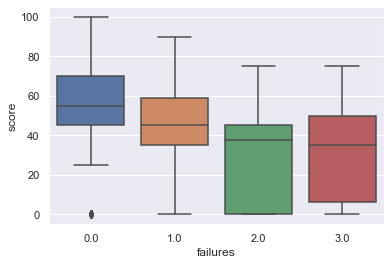

In [1324]:
#Посмотрим, какова зависимость между количеством неудач и оценкой посредством боксплот. 
sns.boxplot(x='failures', y='score', 
                data=students)
#Видно, что есть зависимоть: чем больше неудач, тем хуже сдается экзамен. 
#Дальше проверим эту гипотезу на корреляционной матрице.

count     379
unique      2
top        no
freq      330
Name: schoolsup, dtype: object

no     330
yes     49
Name: schoolsup, dtype: int64

9

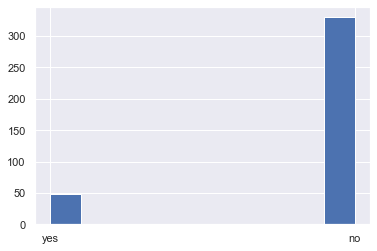

In [1325]:
#schoolsup — дополнительная образовательная поддержка (yes или no)
display(students.schoolsup.describe())
display(students.schoolsup.value_counts())
display(students.schoolsup.isnull().sum())
students.schoolsup.hist()


In [1326]:
#Заменим пустые 9 значений модой.
students.schoolsup.fillna(students.schoolsup.mode()[0], inplace = True)

#Проверим результат заполнения
display(students.schoolsup.value_counts())
display(students.schoolsup.isnull().sum())



no     339
yes     49
Name: schoolsup, dtype: int64

0

count     350
unique      2
top       yes
freq      216
Name: famsup, dtype: object

yes    216
no     134
Name: famsup, dtype: int64

38

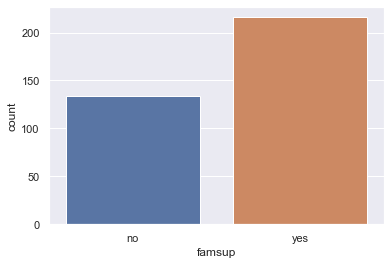

In [1327]:
#famsup — семейная образовательная поддержка (yes или no)
display(students.famsup.describe())
display(students.famsup.value_counts())
display(students.famsup.isnull().sum())
sns.countplot(x = 'famsup', data = students)

In [1328]:
#В колонке famsup 38 пустых значений, заполним значением вышестоящим методом ffill.
students.famsup.fillna(method = 'ffill', inplace = True) 

#Проверим результат заполнения
display(students.famsup.value_counts())
display(students.famsup.isnull().sum())

yes    238
no     150
Name: famsup, dtype: int64

0

count     349
unique      2
top        no
freq      196
Name: paid, dtype: object

no     196
yes    153
Name: paid, dtype: int64

39

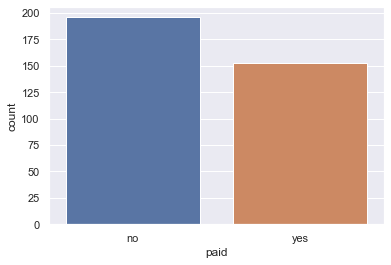

In [1329]:
#paid — дополнительные платные занятия (yes или no)
display(students.paid.describe())
display(students.paid.value_counts())
display(students.paid.isnull().sum())
sns.countplot(x = 'paid', data = students)

In [1330]:
# пропущенных значений - 39. Распределение равномерное. Заполним недостающие значения методом ffill.
students.paid.fillna(method = 'bfill', inplace = True) 

#Проверим результат заполнения
display(students.paid.value_counts())
display(students.paid.isnull().sum())


no     220
yes    168
Name: paid, dtype: int64

0

count     374
unique      2
top       yes
freq      192
Name: activities, dtype: object

yes    192
no     182
Name: activities, dtype: int64

14

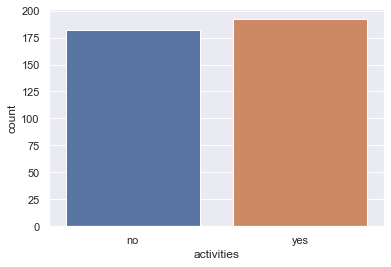

In [1331]:
#activities — дополнительные внеучебные занятия (yes или no)
display(students.activities.describe())
display(students.activities.value_counts())
display(students.activities.isnull().sum())
sns.countplot(x = 'activities', data = students)

In [1332]:
# пропущенных значений - 14. Распределение равномерное. Заполним недостающие значения методом bfill.
students.activities.fillna(method = 'bfill', inplace = True) 

#Проверим результат заполнения
display(students.activities.value_counts())
display(students.activities.isnull().sum())

yes    201
no     187
Name: activities, dtype: int64

0

count     373
unique      2
top       yes
freq      297
Name: nursery, dtype: object

yes    297
no      76
Name: nursery, dtype: int64

15

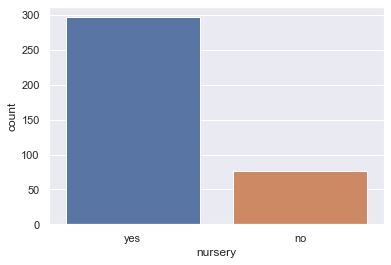

In [1333]:
#nursery — посещение сада учеником (yes или no)
display(students.nursery.describe())
display(students.nursery.value_counts())
display(students.nursery.isnull().sum())
sns.countplot(x = 'nursery', data = students)

In [1334]:
# пропущенных значений - 15. Заполним недостающие значения методом bfill.
students.nursery.fillna(method = 'bfill', inplace = True) 

#Проверим результат заполнения
display(students.nursery.value_counts())
display(students.nursery.isnull().sum())

yes    310
no      78
Name: nursery, dtype: int64

0

count     368
unique      2
top       yes
freq      350
Name: higher, dtype: object

yes    350
no      18
Name: higher, dtype: int64

20

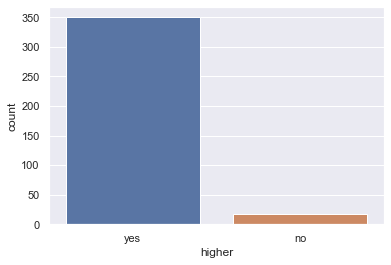

In [1335]:
#higher — хочет получить высшее образование (yes или no)
display(students.higher.describe())
display(students.higher.value_counts())
display(students.higher.isnull().sum())
sns.countplot(x = 'higher', data = students)

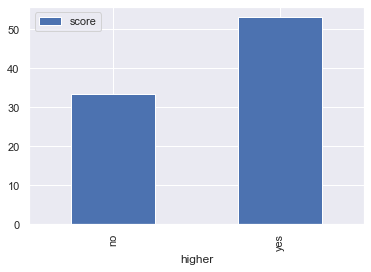

In [1336]:
#Посмотрим, средние значения результатов экзамена в зависимости от желания получить выысшее образование.
students.pivot_table(values = ['score'], 
               index = 'higher', 
               aggfunc = 'mean').plot(kind = 'bar')

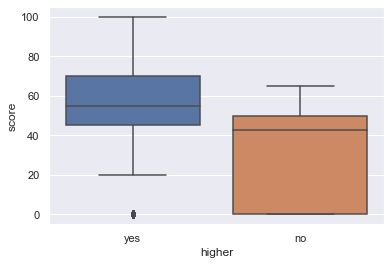

In [1337]:
sns.boxplot(x='higher', y='score', data=students)

In [1338]:
#Так как 350/(18+350)*100% = 95% учеников хотят получить высшее образование (почти все), заполним 20 пустых ячеек модой.
students.higher.fillna(students.higher.mode()[0], inplace = True)

#Проверим результат заполнения
display(students.higher.value_counts())
display(students.higher.isnull().sum())


yes    370
no      18
Name: higher, dtype: int64

0

count     354
unique      2
top       yes
freq      299
Name: internet, dtype: object

yes    299
no      55
Name: internet, dtype: int64

34

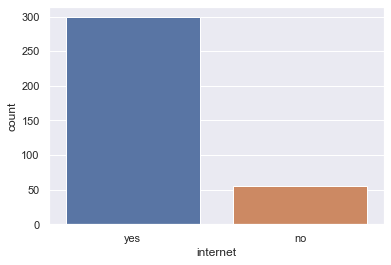

In [1339]:
#internet — наличие интернета дома (yes или no)
display(students.internet.describe())
display(students.internet.value_counts())
display(students.internet.isnull().sum())
sns.countplot(x = 'internet', data = students)

In [1340]:
# пропущенных значений - 34. Заполним недостающие значения методом bfill.
students.internet.fillna(method = 'bfill', inplace = True) 

#Проверим результат заполнения
display(students.internet.value_counts())
display(students.internet.isnull().sum())

yes    327
no      61
Name: internet, dtype: int64

0

count     357
unique      2
top        no
freq      235
Name: romantic, dtype: object

no     235
yes    122
Name: romantic, dtype: int64

31

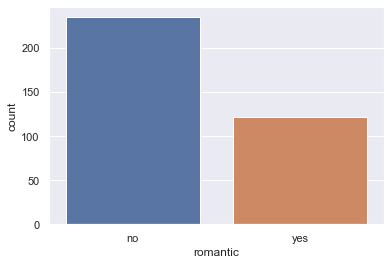

In [1341]:
#romantic — романтические отношения (yes или no)
display(students.romantic.describe())
display(students.romantic.value_counts())
display(students.romantic.isnull().sum())
sns.countplot(x = 'romantic', data = students)

In [1342]:
# пропущенных значений - 31. Заполним недостающие значения методом bfill.
students.romantic.fillna(method = 'bfill', inplace = True) 

#Проверим результат заполнения
display(students.romantic.value_counts())
display(students.romantic.isnull().sum())

no     255
yes    133
Name: romantic, dtype: int64

0

count    361.000000
mean       3.927978
std        0.931139
min       -1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64

 4.0    178
 5.0     96
 3.0     62
 2.0     17
 1.0      7
-1.0      1
Name: famrel, dtype: int64

27

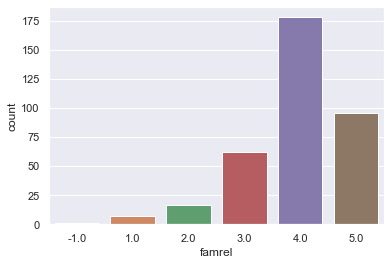

In [1343]:
#famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)
display(students.famrel.describe())
display(students.famrel.value_counts())
display(students.famrel.isnull().sum())
sns.countplot(x = 'famrel', data = students)

In [1344]:
#В одной ячейке опечатка, исправим значение '-1' на '1' с помощью функции
def func_replace_1(row):
    if row['famrel'] == -1:
        return 1
    return row['famrel']
students['famrel'] = students.apply(func_replace_1, axis = 1)     

#Проверим результат выполнения
display(students.famrel.describe())

count    361.000000
mean       3.933518
std        0.907384
min        1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64

In [1345]:
#Теперь можно заполнить пропуски (27). Применим метод bfill
students.famrel.fillna(method = 'bfill', inplace = True) 

#Проверим результат заполнения
display(students.famrel.value_counts())
display(students.famrel.isnull().sum())

4.0    192
5.0    102
3.0     69
2.0     17
1.0      8
Name: famrel, dtype: int64

0

count    379.000000
mean       3.221636
std        0.993874
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64

3.0    152
4.0    109
2.0     63
5.0     37
1.0     18
Name: freetime, dtype: int64

9

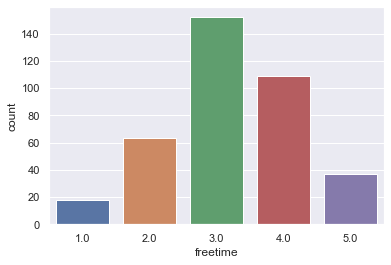

In [1346]:
#freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)
display(students.freetime.describe())
display(students.freetime.value_counts())
display(students.freetime.isnull().sum())
sns.countplot(x = 'freetime', data = students)

In [1347]:
#Теперь можно заполнить пропуски (9). Применим метод bfill
students.freetime.fillna(method = 'bfill', inplace = True) 

#Проверим результат заполнения
display(students.freetime.value_counts())
display(students.freetime.isnull().sum())

3.0    155
4.0    113
2.0     64
5.0     37
1.0     19
Name: freetime, dtype: int64

0

count    381.000000
mean       3.089239
std        1.113276
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64

3.0    126
2.0    101
4.0     81
5.0     50
1.0     23
Name: goout, dtype: int64

7

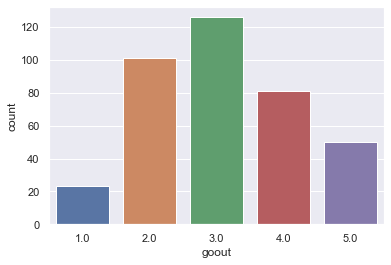

In [1348]:
#goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)
display(students.goout.describe())
display(students.goout.value_counts())
display(students.goout.isnull().sum())
sns.countplot(x = 'goout', data = students)

In [1349]:
#Заполним пропуски (7) с помощью метода bfill
students.goout.fillna(method = 'bfill', inplace = True) 

#Проверим результат заполнения
display(students.goout.value_counts())
display(students.goout.isnull().sum())

3.0    129
2.0    103
4.0     81
5.0     51
1.0     24
Name: goout, dtype: int64

0

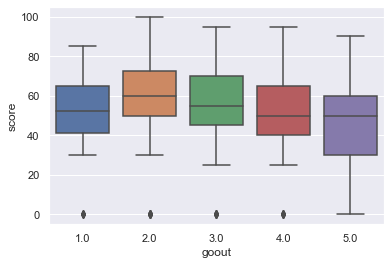

In [1350]:
#Предварительно проверим влияение goout на оценки
sns.boxplot(x='goout', y='score', data=students)
#Из графика видим влияние на оценку

count    373.000000
mean       3.536193
std        1.397734
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64

5.0    137
3.0     88
4.0     60
1.0     46
2.0     42
Name: health, dtype: int64

15

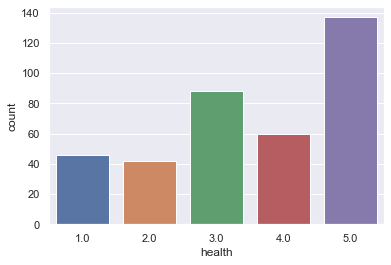

In [1351]:
#health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)
display(students.health.describe())
display(students.health.value_counts())
display(students.health.isnull().sum())
sns.countplot(x = 'health', data = students)

In [1352]:
#Пропусков в этой колонке 15.
#Из графика видно, что распределение равномерное со смещением вправо (здоровых студентов больше)
#Значит меням пустоты на нижележащее значение по методу bfill.
students.health.fillna(method = 'bfill', inplace = True) 

#Проверим результат заполнения
display(students.health.value_counts())
display(students.health.isnull().sum())

5.0    142
3.0     89
4.0     64
1.0     48
2.0     45
Name: health, dtype: int64

0

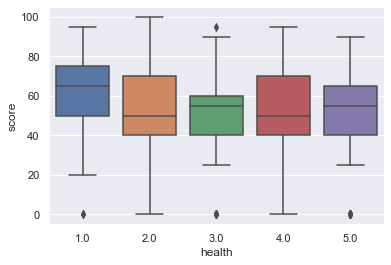

In [1353]:
#Предварительно проверим влияение health на оценки
sns.boxplot(x='health', y='score', data=students)
#Из графика видим, что влияние практически отсутствует

In [1354]:
#absences — количество пропущенных занятий
display(students.absences.describe())
display(students.absences.isnull().sum())
#sns.countplot(x = 'absences', data = students)
#В данном распределении явно есть выбросы. Так как максимальное значение 385 выбивается из общего набора данных.

count    377.000000
mean       7.297082
std       23.642659
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

11

In [1355]:
#Заполним пустые значения (11) с помощью метода bfill.
students.absences.fillna(method = 'bfill', inplace = True) 

#Проверим результат заполнения
display(students.absences.isnull().sum())

0

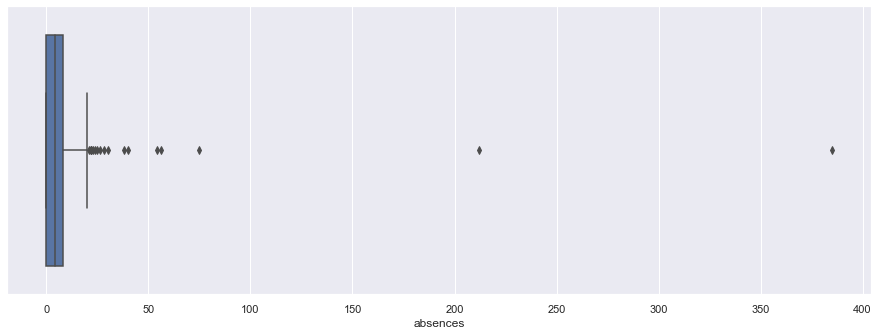

In [1356]:
#Чтобы оценить количество выбросов, построим боксплот для параметра  'absences'.
fig = plt.figure()
axes = fig.add_axes([0, 0, 2, 1])
sns.boxplot(x='absences', data=students)

#Из графика видна череда выбросов, которые обозначены ромбиками.

In [1133]:
Признак 'absences' числовой
Найдем границы выбросов

In [1357]:
display(students.absences.value_counts()) #расределение общее для количества пропущенных занятий
display(students[students.absences>20].absences.value_counts())  #для значений больше 20
display(len(students[students.absences>20])) #количество строк со значениями больше 20 пропущенных занятий

0.0      112
2.0       62
4.0       54
6.0       32
8.0       20
10.0      17
14.0      14
12.0      12
3.0        7
16.0       6
7.0        6
5.0        5
18.0       5
22.0       4
20.0       4
9.0        3
1.0        3
15.0       2
13.0       2
11.0       2
25.0       1
54.0       1
385.0      1
26.0       1
56.0       1
24.0       1
212.0      1
21.0       1
75.0       1
30.0       1
19.0       1
38.0       1
40.0       1
23.0       1
17.0       1
28.0       1
Name: absences, dtype: int64

22.0     4
212.0    1
23.0     1
40.0     1
38.0     1
30.0     1
75.0     1
21.0     1
385.0    1
28.0     1
24.0     1
56.0     1
26.0     1
54.0     1
25.0     1
Name: absences, dtype: int64

18

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


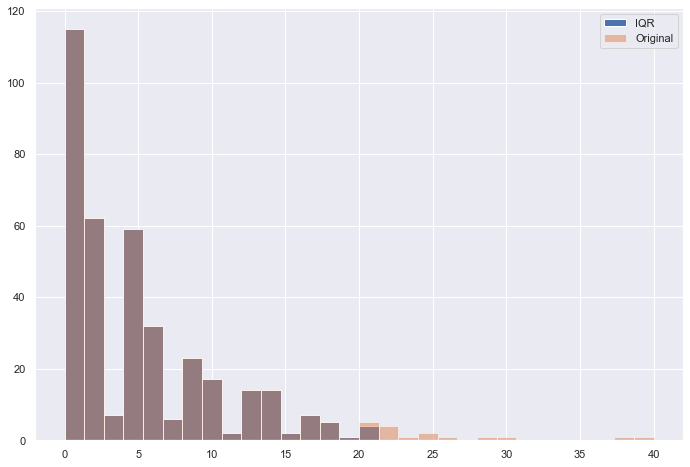

In [1358]:
median = students.absences.median()
IQR = students.absences.quantile(0.75) - students.absences.quantile(0.25)
p25 = students.absences.quantile(0.25)
p75 = students.absences.quantile(0.75)

print('25-й перцентиль: {},'.format(p25), '75-й перцентиль: {},'.format(p75), "IQR: {}, ".format(IQR), 
      "Границы выбросов: [{f}, {l}].".format(f=p25 - 1.5*IQR, l=p75 + 1.5*IQR))
#Построим срвнительный график между IQR и изначальными данными (Original)
fig = plt.figure()
axes = fig.add_axes([0, 0, 1.5, 1.5])
students.absences.loc[students.absences.between(p25 - 1.5*IQR, p75 + 1.5*IQR)].hist(bins = 30, range = (0, 40), label = 'IQR')
students.absences.hist(alpha = 0.5, bins=30, range = (0, 40), label = 'Original')
plt.legend();

In [ ]:
Значения, которые лежат за границами выбросов нужно отсечь. Их получилось 18 штук.

In [1359]:
#Убираем выбросы сверху фильтрацией в колонке 'absences'.
students = students[students.absences <= 20]
students

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,GT3,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,yes,yes,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,T,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,yes,no,yes,yes,yes,yes,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,other,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389,MS,F,18,U,GT3,T,1.0,1.0,other,other,course,mother,1.0,2.0,1.0,no,no,no,yes,yes,yes,no,no,1.0,1.0,1.0,5.0,0.0,0.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,mother,1.0,1.0,3.0,no,no,no,no,no,yes,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,no,no,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


In [ ]:
Осталось 370 строк. Таким образом датасет сократился на 17 строк.

In [1360]:
#Данные очищены. Можно приступать к анализу.
students.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
pstatus       0
medu          0
fedu          0
mjob          0
fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
health        0
absences      0
score         0
dtype: int64

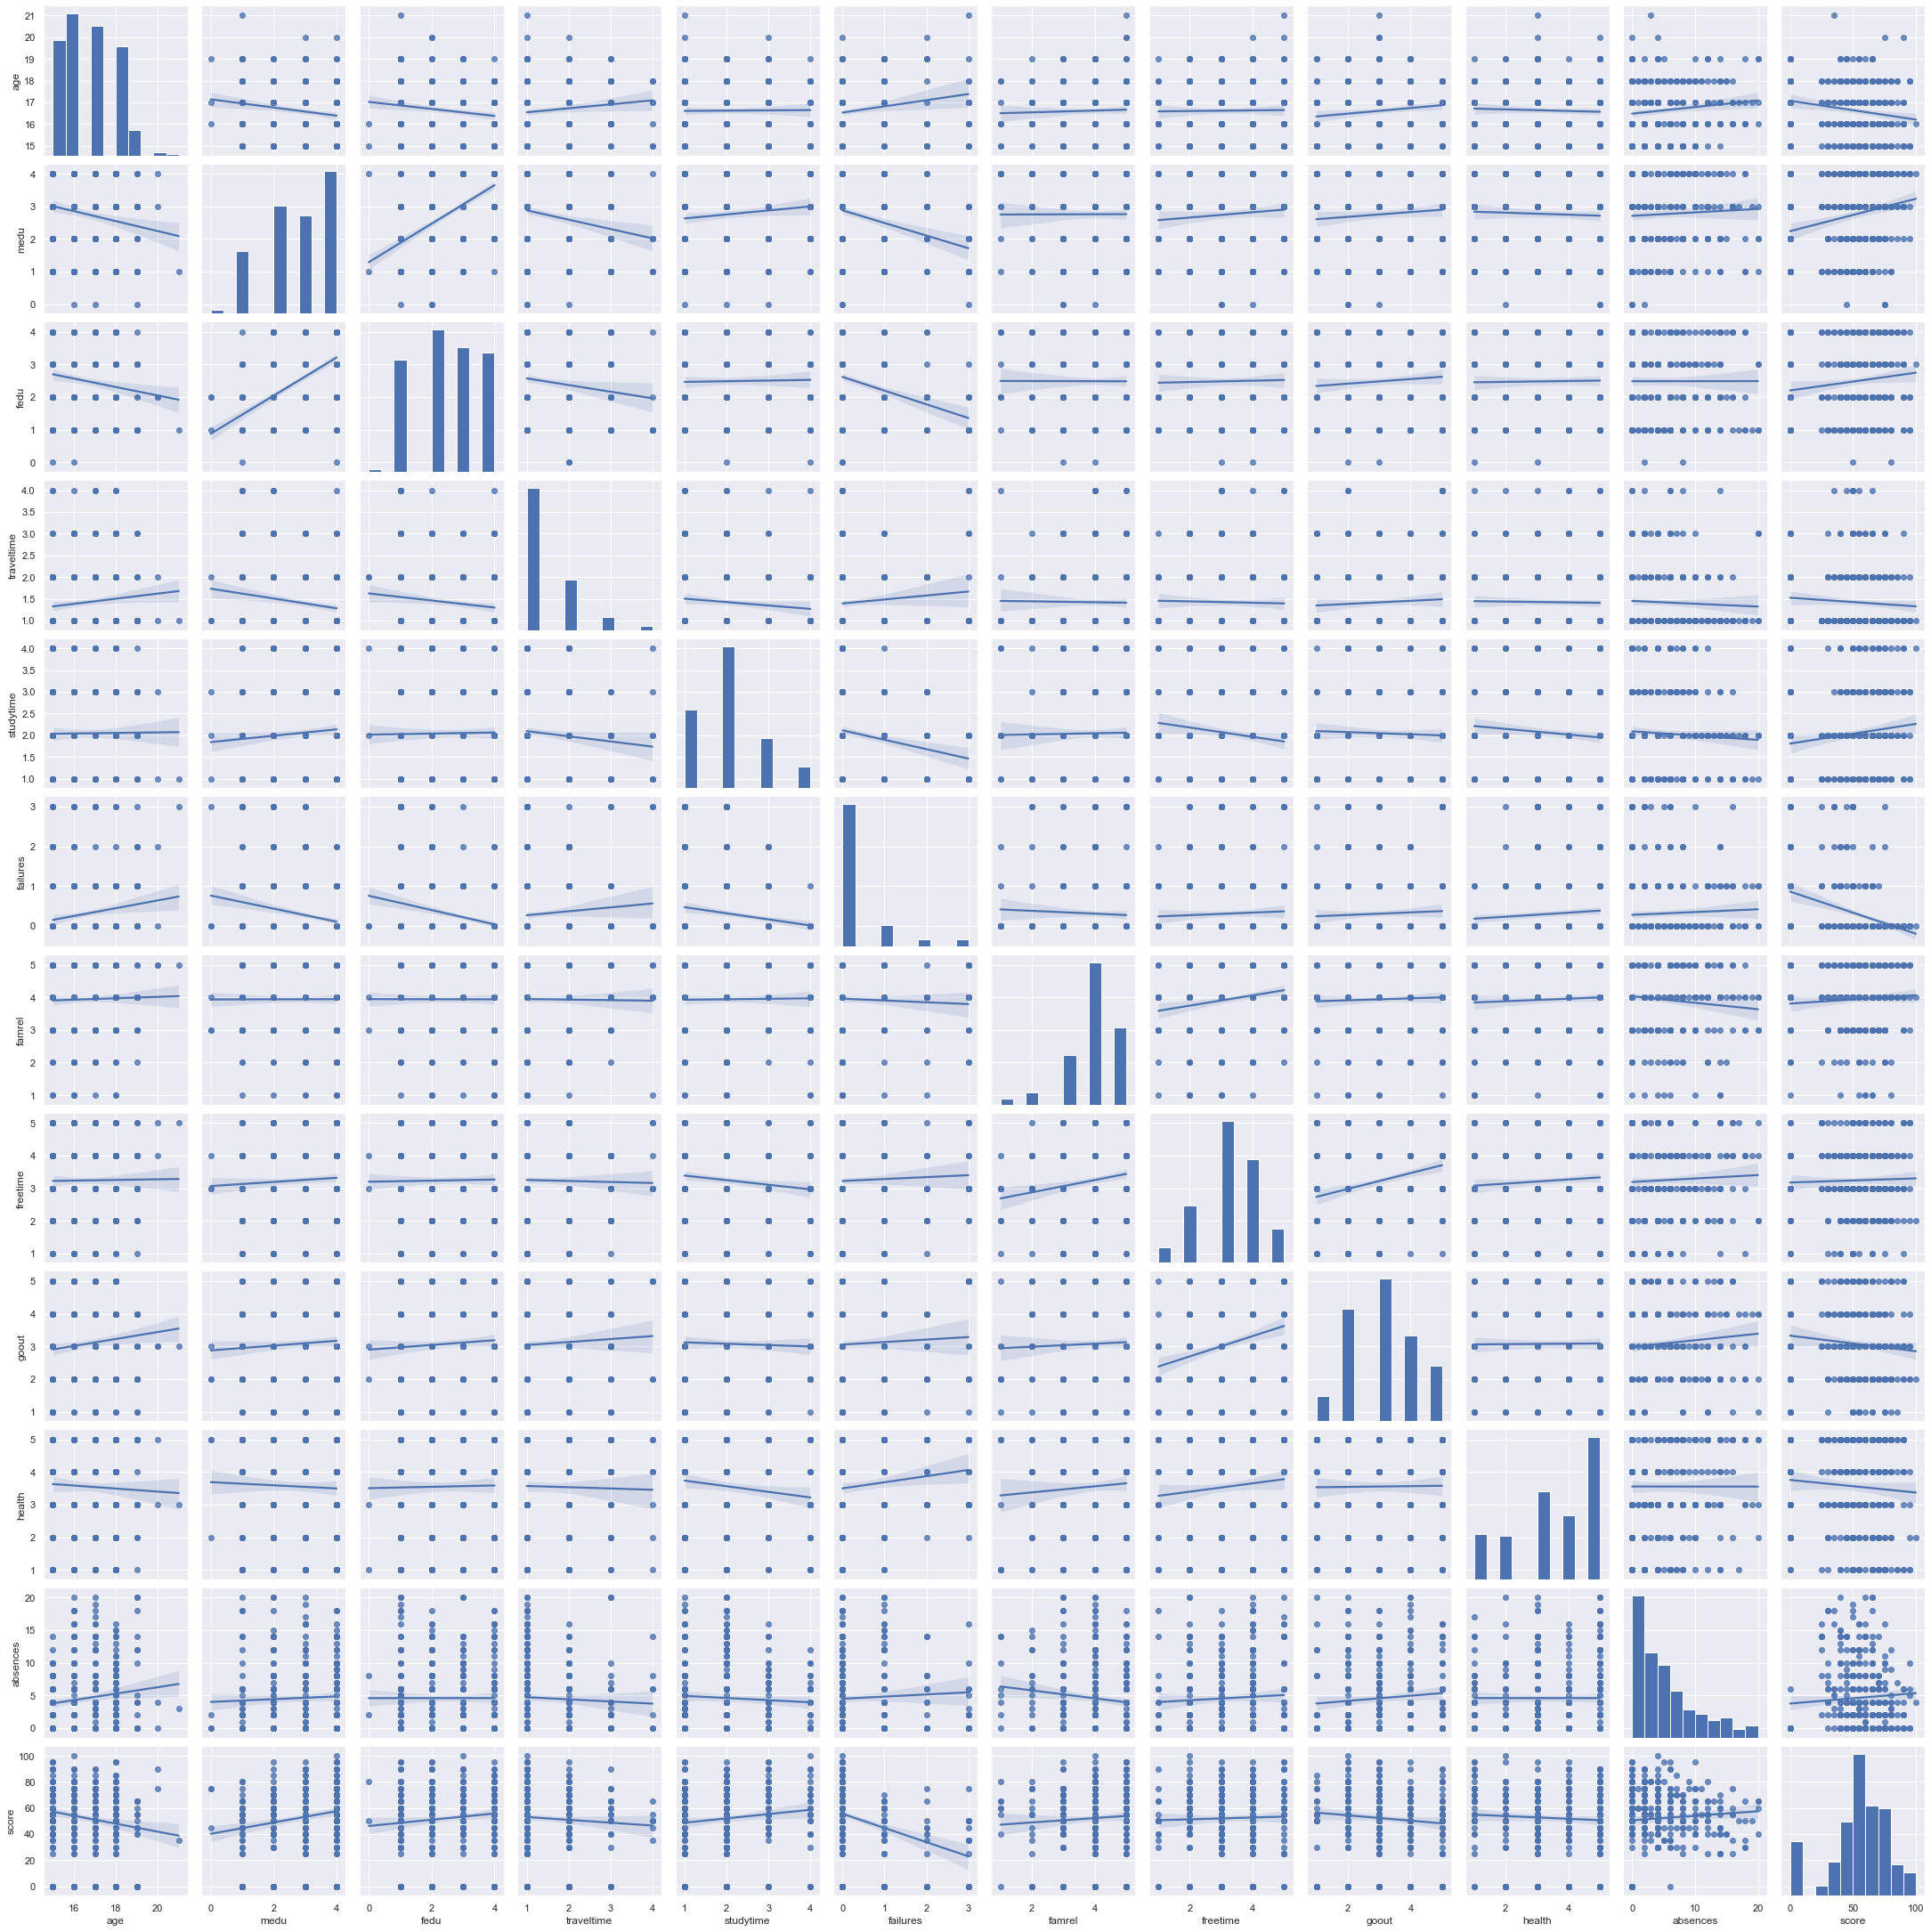

In [1361]:
#Выясним, какие столбцы коррелируют с оценками по математике. 
#Это поможет понять, какие параметры стоит оставить для модели, а какие — исключить. 
#Корреляции рассмотрим только для числовых столбцов.
#Для быстрого построения графиков зависимости переменных можно воспользоваться функцией pairplot из модуля seaborn:
sns.pairplot(students, kind = 'reg')

In [1362]:
#Используем для наглядности матрицу корреляций:
students.corr()

,age,medu,fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
age,1.000000,-0.169344,-0.144677,0.103691,0.008746,0.166399,0.029795,0.012237,0.117896,-0.040712,0.122443,-0.162092
medu,-0.169344,1.000000,0.587675,-0.179855,0.094800,-0.251745,0.002431,0.071451,0.073369,-0.038550,0.047663,0.207587
fedu,-0.144677,0.587675,1.000000,-0.128734,0.016364,-0.274652,-0.001994,0.018728,0.071674,0.016351,0.000685,0.114283
traveltime,0.103691,-0.179855,-0.128734,1.000000,-0.096455,0.094859,-0.013655,-0.021944,0.057384,-0.019223,-0.046215,-0.065614
studytime,0.008746,0.094800,0.016364,-0.096455,1.000000,-0.181599,0.013977,-0.122876,-0.032430,-0.105835,-0.056921,0.122386
failures,0.166399,-0.251745,-0.274652,0.094859,-0.181599,1.000000,-0.043883,0.043476,0.049718,0.097393,0.048307,-0.338732
famrel,0.029795,0.002431,-0.001994,-0.013655,0.013977,-0.043883,1.000000,0.172243,0.037202,0.060082,-0.109839,0.065471
freetime,0.012237,0.071451,0.018728,-0.021944,-0.122876,0.043476,0.172243,1.000000,0.275248,0.090242,0.053503,0.029758
goout,0.117896,0.073369,0.071674,0.057384,-0.032430,0.049718,0.037202,0.275248,1.000000,0.009293,0.089618,-0.099381
health,-0.040712,-0.038550,0.016351,-0.019223,-0.105835,0.097393,0.060082,0.090242,0.009293,1.000000,-0.000584,-0.064035


In [258]:
Из таблицы и графиков корреляции можно сказать, что сильная отрицательная корреляция есть между failures и score.
Она равна -0.34. То есть количество количество внеучебных неудач плохо сказывается на оценках.

Скоррелированны положительно с оценкой также(0.20 и 0.11) переменные fedu и medu. Что говорит о том, что 
хорошее образование родителей сказывается на отметках, образование мамы играет бОльшую роль в положительном влиянии
на образование ребенка.

Еще можно увидеть, что переменная studytime также скоррелирована положительно с оценкой за экзамен: 0.122.
Значит время, проведенное вне школы за учебой, потрачено учениками не зря. Это должно радовать.

Скоррелирована отрицательно с отметкой переменная goout: -0.09. Это говорит о том, что ученики, 
потерявшие больше времени с друзьями хуже справились с заданием.

Одинаково слабо и отрицательно скорррелированы с оценкой еще две переменные health и traveltime: 0.06.
Можно предположить, что те ребята, которые хуже себя чувствовали, следовательно, больше занимались и лучше сдали экзамен. 
Что касается учеников которые дольше добираются до дома, то они сдали экзамен немного хуже, тех, кому до дома ближе.

Также интересна кореляция между уровнем образования родителей (уровни образования мамы и папы положительно коррелируют 0.59). 
А также прослеживаетсяотрицательное влияние уровня образования родителей на внеучебные неудачи ребенка 
(чем выше образованнее родителей, тем неудач меньше).

In [1363]:
#Создадим новый датафрейм с вычисленными корреляциями между числовыми признаками и построим тепловую карту.
correlation = students.corr()


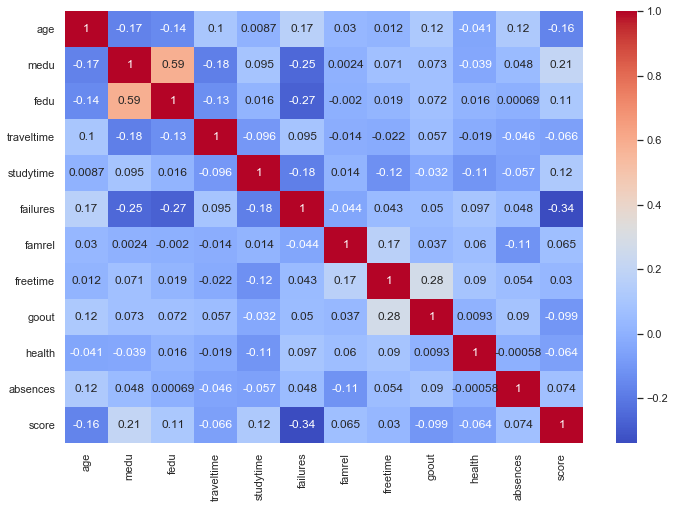

In [1364]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1.5, 1.5])
sns.heatmap(correlation, annot=True, cmap='coolwarm')

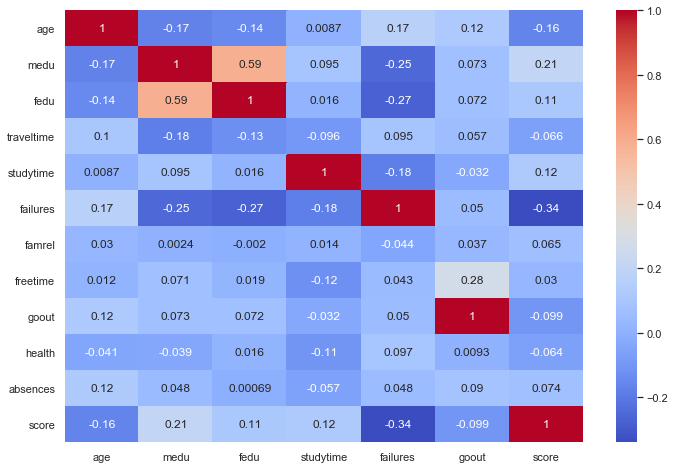

In [1365]:
#Признаки 'absences', 'health', 'freetime', 'famrel', 'traveltime' имееют
#самую слабую корреляцию с главным признаком 'score'.

#Выведем тепловую карту для самых сильноскореллированных признаков с признаком 'score'.

fig = plt.figure()
axes = fig.add_axes([0, 0, 1.5, 1.5])
sns.heatmap(correlation[['age', 'medu', 'fedu','studytime', 'failures', 'goout', 'score']], annot=True, cmap='coolwarm')

In [1366]:
#Выведем корреляцию только для нашего главного параметра 'score' со всеми значимыми признаками.
c = correlation.loc[:, ['score']]
display(c)

,score
age,-0.162092
medu,0.207587
fedu,0.114283
traveltime,-0.065614
studytime,0.122386
failures,-0.338732
famrel,0.065471
freetime,0.029758
goout,-0.099381
health,-0.064035


In [1367]:
#Выведем список уникальных значений для категориальных переменных в нашем датасете.
display(students[['school','sex','address','famsize','pstatus','fjob','mjob', 'reason','guardian',
          'schoolsup','famsup','paid','activities','nursery','higher','internet','romantic']].nunique())
print('Количество уникальных значений для категориальных переменных', len(students[['school','sex','address','famsize','pstatus','fjob','mjob', 'reason','guardian',
          'schoolsup','famsup','paid','activities','nursery','higher','internet','romantic']].nunique()))

school        2
sex           2
address       2
famsize       2
pstatus       2
fjob          5
mjob          5
reason        4
guardian      3
schoolsup     2
famsup        2
paid          2
activities    2
nursery       2
higher        2
internet      2
romantic      2
dtype: int64

Количество уникальных значений для категориальных переменных 17


In [1368]:
#Анализ номинативных переменных
#Создадим функцию, которая принимает на вход колонки с уникальными значениями и выводит последовательно 
#боксплоты для каждой колонки.
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (10, 8))
    sns.boxplot(x=column, y='score', 
                data=students)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()


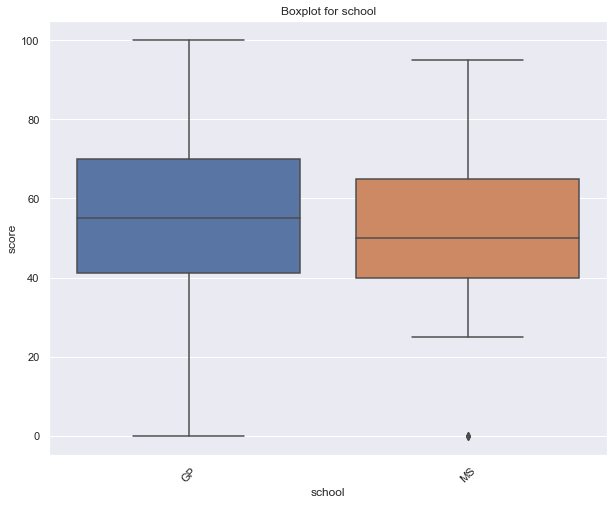

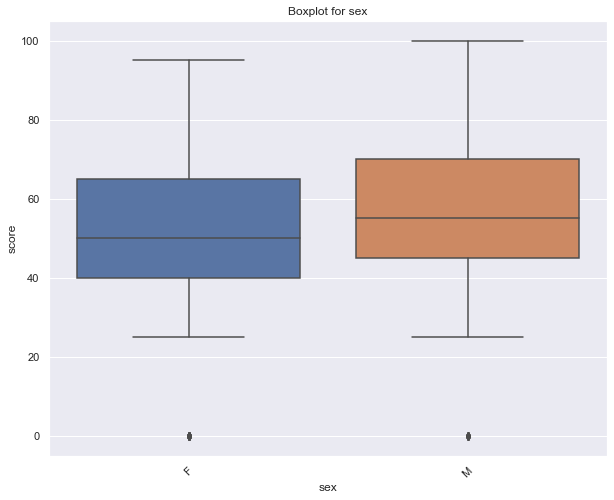

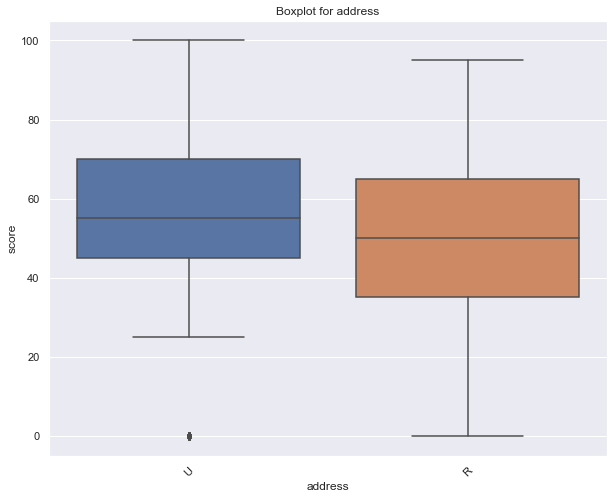

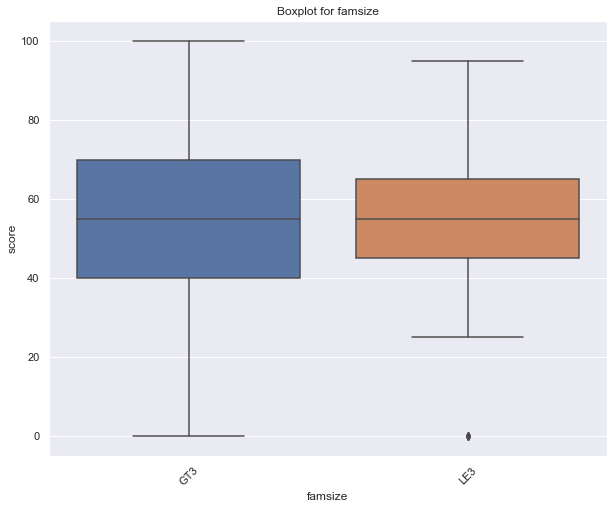

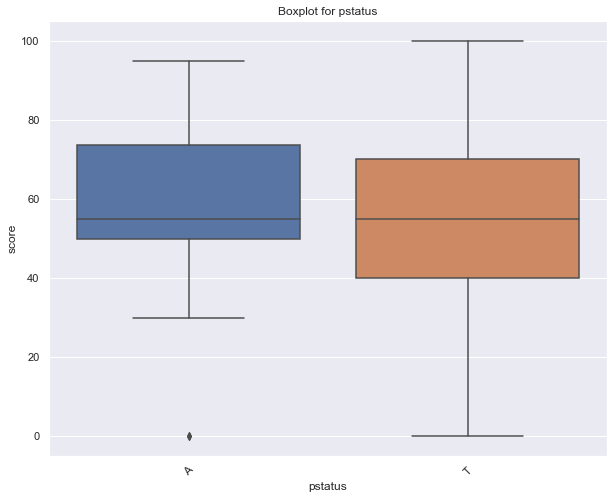

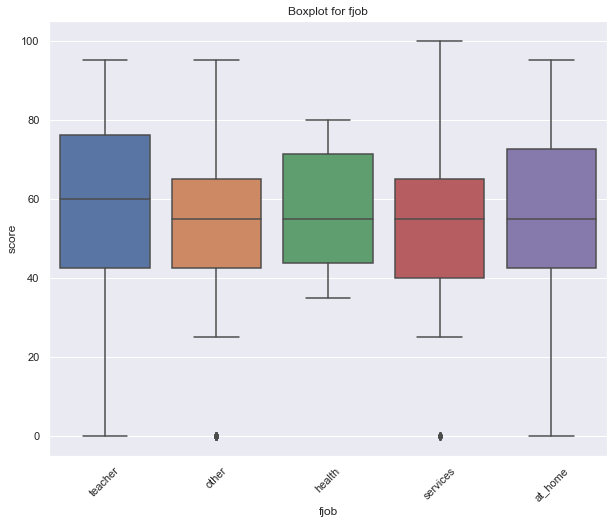

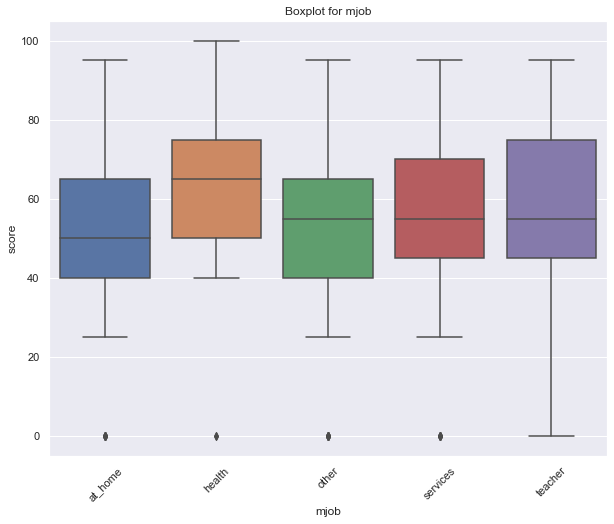

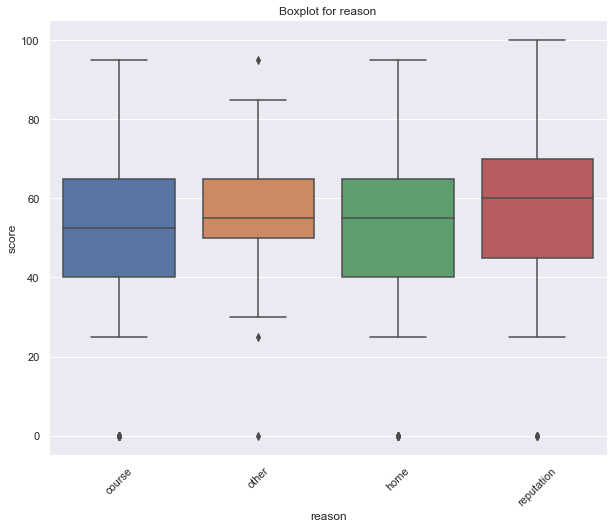

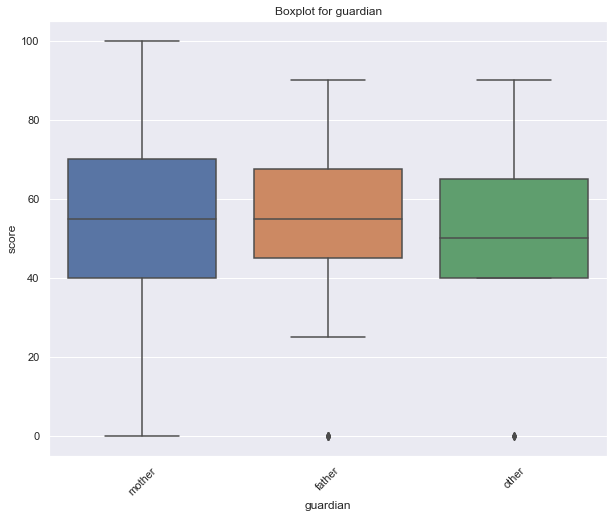

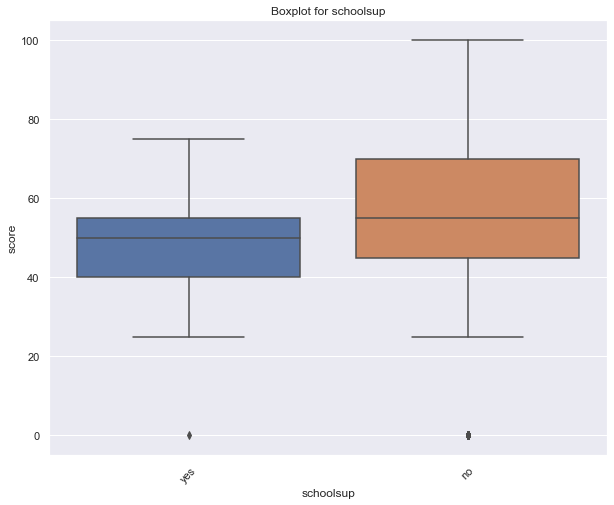

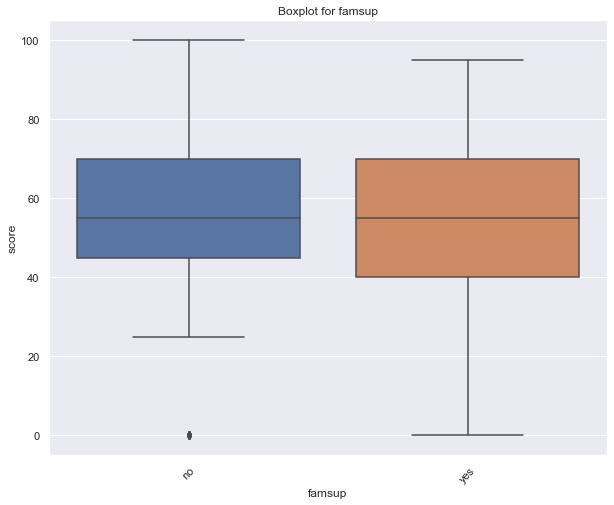

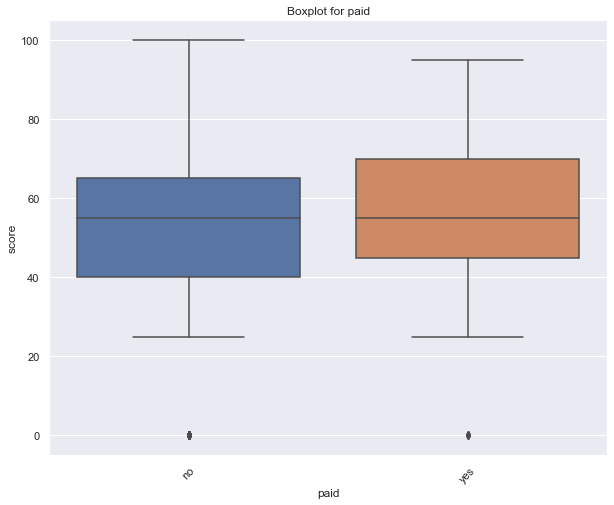

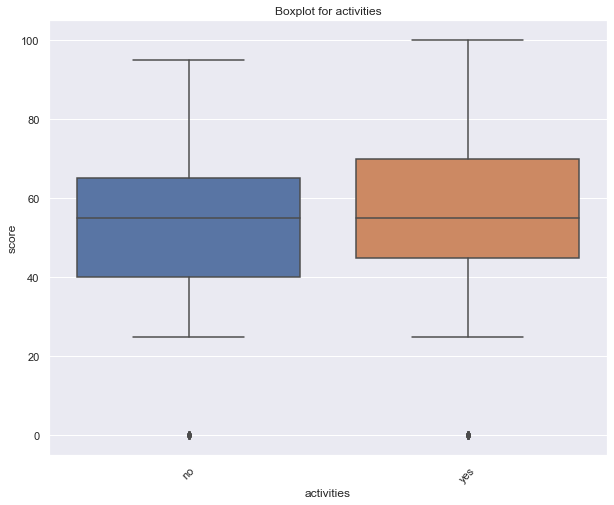

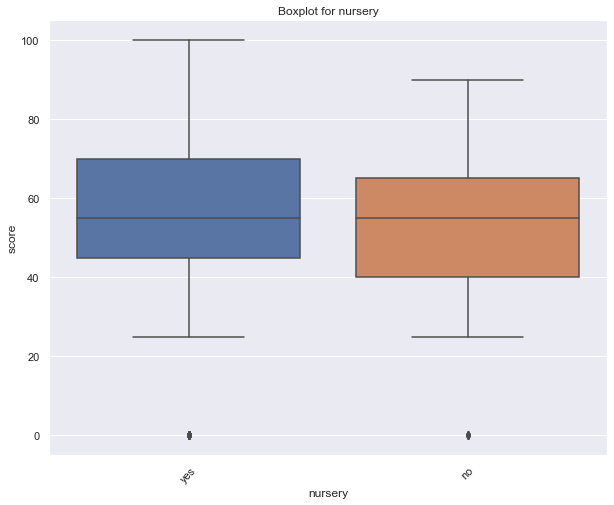

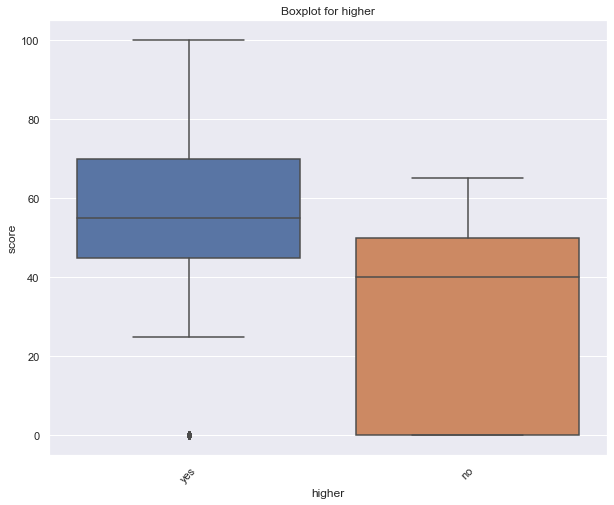

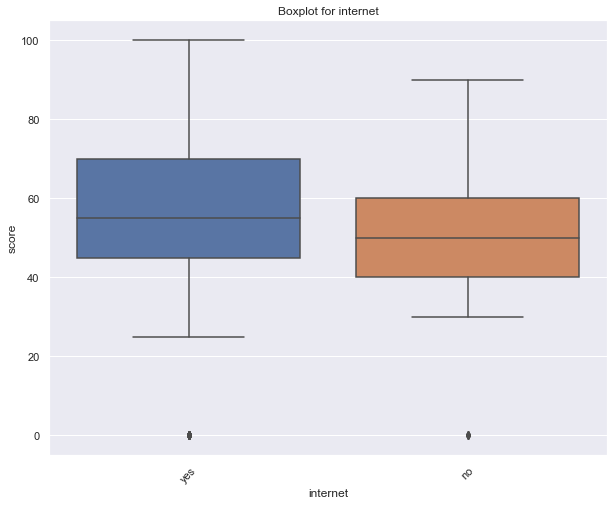

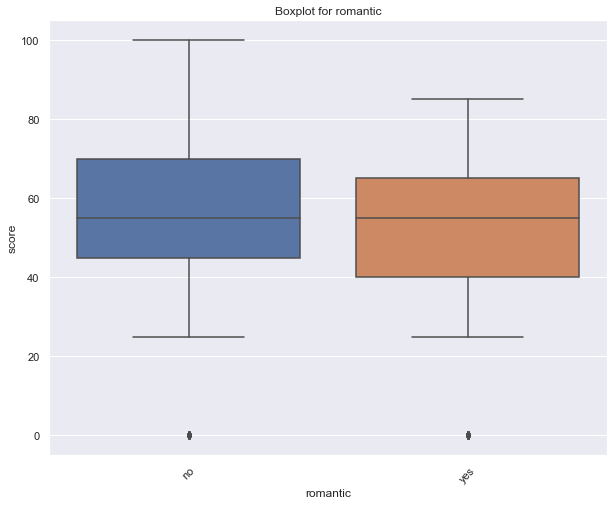

In [1369]:
## Рисуем последовательно диаграммы, отображающие распределение оценки по математике 
#в зависимости от разных номинативных признаков.
for col in ['school','sex','address','famsize','pstatus','fjob','mjob', 'reason','guardian',
          'schoolsup','famsup','paid','activities','nursery','higher','internet','romantic']:
    get_boxplot(col)



In [262]:
Выводы:
По графикам похоже, что параметры, которые могут влиять на оценку по математике это:
school, address, mjob, fjob, reason, guardian, schoolsup, higher, internet.
Однако графики являются лишь вспомогательным инструментом, настоящую значимость различий может помочь 
распознать статистика. Проверим, есть ли статистическая разница в распределении оценок по номинативным признакам, 
с помощью теста Стьюдента. Проверим нулевую гипотезу о том, что распределения оценок по математике 
по различным параметрам неразличимы.



In [1370]:
#ДОПУЩЕНИЯ:

#-Выборки взяты случайно.
#-Выборки взяты независимо друг от друга.
#-Выборки достаточно велики(больше 30)
#Допущения выполняются, переменные распределены нормально, поэтому можно применять центральную предельную теорему и
#пользоваться формулой для распределения Стьюдента.
#Определим значения p-value для нулевой гипотезы
#Предполагаем что средние значения данных выборок относительно переменной  'skore' 
#равны (нулевая гипотеза). Вычислим вероятность при помощи p-value (от 0 до 1, где 1 это 100% вероятности).
#Потом нужно сравнить значиния pvalue и уровня значимости(зададим его равным 90%, то есть альфа=0.1)
#которая означает что если ttest_ind <= 0.05/len(combinations_all), то вероятность того, что 
#средние значения данных выборок равны или меньше 5%, то мы отвергаем данную гипотезу, и полагаем, что
#найдены статистически значимые различия.

def get_stat_dif(column):
    cols = students.loc[:, column].value_counts().index
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(students.loc[students.loc[:, column] == comb[0], 'score'], 
                        students.loc[students.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [1371]:
for col in ['school','sex','address','famsize','pstatus','fjob','mjob', 'reason','guardian',
          'schoolsup','famsup','paid','activities','nursery','higher','internet','romantic']:
    get_stat_dif(col)
#Проверим нулевую гипотезу о том, что распределения оценок по математике по разным параметрам неразличимы:

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки paid
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic


In [ ]:
Как мы видим, серьёзно отличаются 4 параметра, для этих переменных нулевая гипотеза не подтвердилась: 
'sex', 'paid', 'higher', 'romantic'. Оставим эти переменные в датасете для дальнейшего построения модели. 

Итак, в нашем случае важные переменные, которые, возможно, оказывают влияние на итоговую оценку, это: 
'sex', 'paid', 'higher', 'romantic', 'age', 'medu', 'fedu', 'studytime', 'failures', 'goout'.

In [1372]:
students_for_model = students.loc[:, ['sex','paid','higher','romantic','age','medu','fedu','studytime','failures','goout','score']]
students_for_model.head()

,sex,paid,higher,romantic,age,medu,fedu,studytime,failures,goout,score
0,F,no,yes,no,18,4.0,4.0,2.0,0.0,4.0,30.0
1,F,no,yes,no,17,1.0,1.0,2.0,0.0,3.0,30.0
2,F,yes,yes,yes,15,1.0,1.0,2.0,3.0,2.0,50.0
3,F,yes,yes,yes,15,4.0,2.0,3.0,0.0,2.0,75.0
4,F,yes,yes,no,16,3.0,3.0,2.0,0.0,2.0,50.0


In [1373]:
students_for_model.info()
#Итоговая проверка данных. Все чисто.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 370 entries, 0 to 394
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sex        370 non-null    object 
 1   paid       370 non-null    object 
 2   higher     370 non-null    object 
 3   romantic   370 non-null    object 
 4   age        370 non-null    int64  
 5   medu       370 non-null    float64
 6   fedu       370 non-null    float64
 7   studytime  370 non-null    float64
 8   failures   370 non-null    float64
 9   goout      370 non-null    float64
 10  score      370 non-null    float64
dtypes: float64(6), int64(1), object(4)
memory usage: 44.7+ KB


In [ ]:
Подведем итоги разведывательного анализа данных. 

Итак, в результате EDA для анализа влияния условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость 
по математике были получены следующие выводы:
    
    1. В данных были пустые значения. Только лишь 3 столбца не содержали пустых значений. 
    
    2. Провели первичную обработку данных:
    - Один столбец был удален ('studytime, granular'), так как он коррелировал с точностью до знака с другим 
    столбцом. 
    - Удалили 6 строк с пустыми значениями оценок 'score'.
    - Два столбца содержали по одной опечкате, опечатки были заменены на подходящие значения. 
    
    3. Оценили количество уникальных значений для номинативных переменных: всего 27 категориальных переменных, 
    из них 10 оцифрованные (принимают несколько числдовых значений), 13 бинарные (принимают 2 значения) и 
    4 номинативные (принимают значения из определенного нечислового списка значений)
    
    4. Преобразовали данные:
    - Проанализировали и дозаполнили различными способами пустые значения в ячейках. 
    - В том числе при анализе пытались установить и проверяли наличие логических взаимосвязей между данными и 
    использовали эти взаимосвязи для формирования правил (функций) для заполнения пустых значений. 
    - В случаях, когда взаимосвязи было невозможно установить, использовали для устранения пустых значений  моду 
    или заполнение после или впереди-стоящими значениям. 
    - Кроме того, проанализировали и устранили ошибки в данных (для категориальных оцифрованных параметров). 
    
    5. Посмотрели на распределение признаков для числовых переменных, устранили выбросы:
    - Выбросы были найдены в столбце с возрастом. Методология расчета выбросов требует отбросить выброс, равный 
    22 годам, с другой стороны, в условии дано, что возраст экзаменующихся от 15 до 22 лет. Поскольку выброс всего
    один из 395 строк, то можно считать, что он не влияет на распределение данных и его можно удалить. 
    - Так же нашлись выбросы в столбце с количеством пропущенных занятий. Их достаточно много, а именно, 18 штук.
    Мы их удалили.
    - Выбросы в столбце оценок 'score' найдены не были.
    Делаем вывод, что данные достаточно чистые.
    
    6. Провели корреляционный анализ количественных переменных. По результатам анализа были выявлены:
    - Сильная отрицательная корреляция есть между 'failures' и 'score'. То есть количество внеучебных неудач 
    негативно сказывается на оценках.
    - Скоррелирована хорошо и отрицательно с отметкой переменная 'goout'. Это говорит о том, что ученики, 
    проводившие больше времени с друзьями немного хуже справились с заданием.
    - Скоррелированны положительно с оценкой также переменные 'fedu' и 'medu'. Что говорит о том, что хорошее 
    образование родителей сказывается на отметках, образование мамы играет бОльшую роль в положительном влиянии 
    на образование ребенка.
    - Еще можно увидеть, что переменная 'studytime' также скоррелирована положительно с оценкой за экзамен.
    Значит время, проведенное вне школы за учебой, потрачено учениками не зря. Это должно радовать.
    - Интересна кореляция между уровнем образования родителей (уровни образования мамы и папы положительно 
    коррелируют). 
    - А также прослеживается отрицательное влияние уровня образования родителей на внеучебные неудачи ребенка 
    (чем выше образованнее родителей, тем неудач меньше).
    
    7. Отобрали некоррелирующие переменные - по результатам корреляционного анализа следующие значения слабо 
    коррелируют с оценкой: 'traveltime', 'famrel', 'freetime', 'health', 'absences'.
        
    8. С помощью распределения Стьюдента проанализировали номинативные переменные и устраните те, которые 
    не влияют на предсказываемую величину 'score'. Были удалены переменные 'school', 'address', 'famsize',
    'pstatus', 'fjob', 'mjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'activities', 'nursery' и 'internet'.
            
    9. Сформирован обновленный набор данных, содержащий только значимые для 'score' параметры, которые 
    предлагается использовать в дальнейшем для построения модели. Это параметры: 'sex', 'paid', 'higher', 
    'romantic', 'age', 'medu', 'fedu', 'studytime', 'failures', 'goout'.